In [10]:
library(DESeq2)
library(RColorBrewer)

In [11]:
library(reshape2)


In [12]:
library("gplots")


In [41]:
library("GGally")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [13]:
library(readxl)
library(tidyverse)

In [14]:
library("pheatmap")
library("RColorBrewer")

In [48]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 300)

In [16]:
HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'
PRO_COLOR = 'MediumSeaGreen'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(P =PCOLOR_light, C = PRO_COLOR)
)


In [17]:
list.files()

[1] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
[2] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
[3] "CC1A3 RNASEQ MED4 correlation.ipynb"          
[4] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
[5] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
[6] "CC1A3 WGCNA CC.ipynb"                         
[7] "data"                                         
[8] "DE_results"

In [24]:
vsd = read.csv(file.path('DE_results','MED4_DE_DESEQ_vsd.csv')) %>%
   rename(c(gene_id = X)) 

head(vsd)

,gene_id,C1A,C1B,C1C,C2A,C2B_1,C2C_1,C3A_1,C3B,C3C_1,⋯,C4C,C5A,C5B,C5C,P1A,P1B,P1C,P2A,P2B,P2C
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TX50_RS00020,10.199306,10.138608,11.552435,10.233089,10.846940,10.968598,10.277762,10.708205,10.925488,⋯,10.673880,10.903510,10.828046,10.566447,10.145981,10.133392,9.980252,11.671632,12.075326,12.089237
2,TX50_RS00025,7.201485,7.403180,8.070099,7.613555,7.034628,7.294078,6.716129,6.561249,6.098862,⋯,6.833144,7.123598,6.415651,7.179944,7.415239,6.965448,7.480714,7.102511,7.573653,7.703449
3,TX50_RS00030,8.599562,8.771120,10.002316,8.897714,8.846223,9.168677,9.715876,9.518070,9.788721,⋯,10.293683,9.577001,9.988663,10.011130,8.774283,8.959921,8.768441,11.021224,11.593740,11.775872
4,TX50_RS00035,8.466332,8.538664,8.319138,8.517611,8.372679,8.572956,8.523269,8.581421,8.191762,⋯,8.794819,8.502947,8.517462,8.733940,8.441880,8.775660,8.489322,9.186228,9.908075,10.219909
5,TX50_RS00040,9.316846,9.542356,10.613334,9.655292,10.014346,9.940660,9.331278,9.159758,9.212120,⋯,9.543625,9.515104,9.410598,9.472152,9.356303,9.506277,9.259842,10.600202,10.181465,10.279694
6,TX50_RS00045,7.051232,6.830920,8.314047,7.850284,7.113894,7.198608,6.205762,7.496614,7.157745,⋯,6.630732,7.045868,6.858691,6.946624,6.840204,6.424365,6.866480,8.181493,8.883846,8.507696


In [20]:
names(vsd)

[1] "X"     "C1A"   "C1B"   "C1C"   "C2A"   "C2B_1" "C2C_1" "C3A_1" "C3B"  
[10] "C3C_1" "C4A"   "C4B"   "C4C"   "C5A"   "C5B"   "C5C"   "P1A"   "P1B"  
[19] "P1C"   "P2A"   "P2B"   "P2C"

In [42]:
vd = vsd %>% 
   pivot_longer(cols= -gene_id, values_to = 'vsd', names_to = 'Sample') %>%
   mutate(tp = substr(Sample, 1, 2)) %>%
   mutate(gr  = case_when(
       tp %in% c('P1', 'P2', 'C1', 'C2')~tp,
       tp %in% c('C3', 'C4', 'C5')~'late',
       TRUE ~ tp
   )) %>%
    group_by(gene_id, gr) %>%
    summarise(mean_vsd = mean(vsd)) %>%
    pivot_wider(names_from = gr, values_from = mean_vsd)
head(vd)

`summarise()` has grouped output by 'gene_id'. You can override using the `.groups` argument.


gene_id,C1,C2,P1,P2,late
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS00020,10.630117,10.682876,10.086542,11.945398,10.680538
TX50_RS00025,7.558254,7.314087,7.287134,7.459871,6.715394
TX50_RS00030,9.124333,8.970871,8.834215,11.463612,9.792858
TX50_RS00035,8.441378,8.487748,8.568954,9.771404,8.590548
TX50_RS00040,9.824179,9.870099,9.374141,10.353787,9.416249
TX50_RS00045,7.398733,7.387595,6.710350,8.524345,7.013248


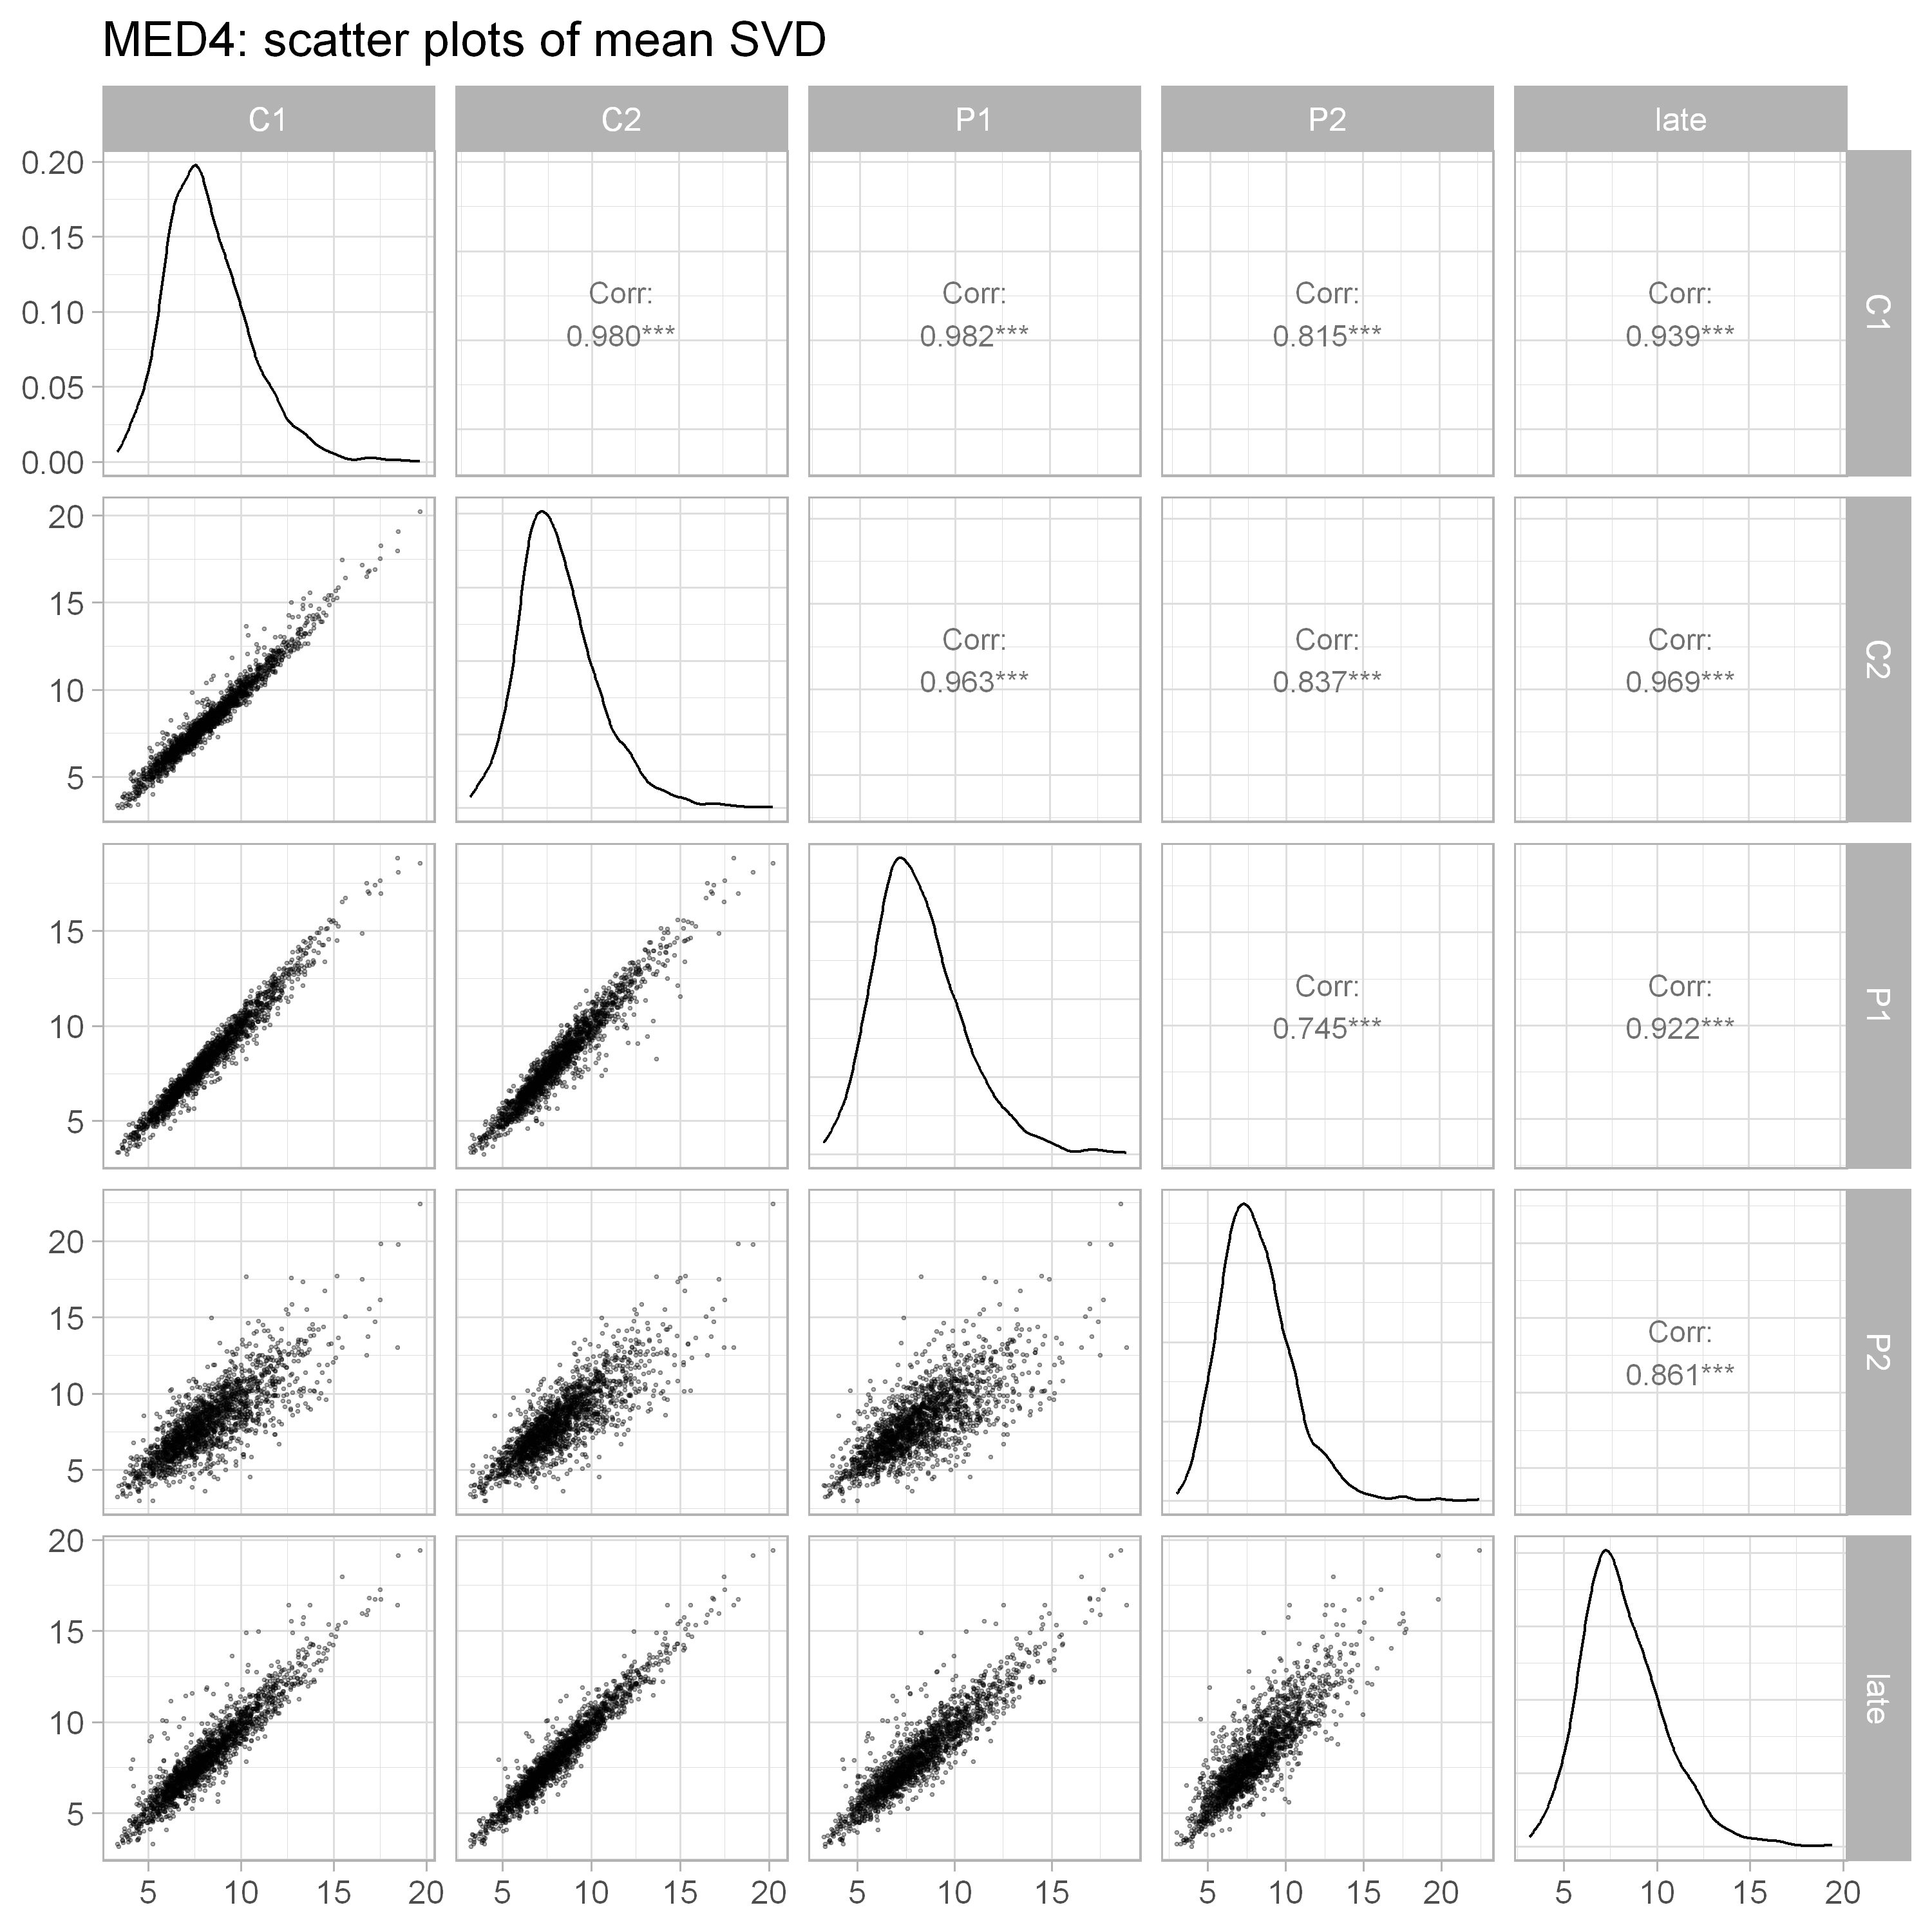

In [43]:

ggpairs(vd , columns = 2:6, 
        #aes(colour=status),
        lower = list(continuous = wrap("points", alpha = 0.3, size=0.5)),
        title='MED4: scatter plots of mean SVD'

       ) +
  #scale_color_manual(values = c(up='red', down='blue', no_significant='black', outlier='grey')) + 
  #scale_fill_manual(values = c(up='red', down='blue', no_significant='black', outlier='grey')) + 

  theme_light(base_size = 15)

    #'no_significant''down''up''outlier'

In [49]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 300)

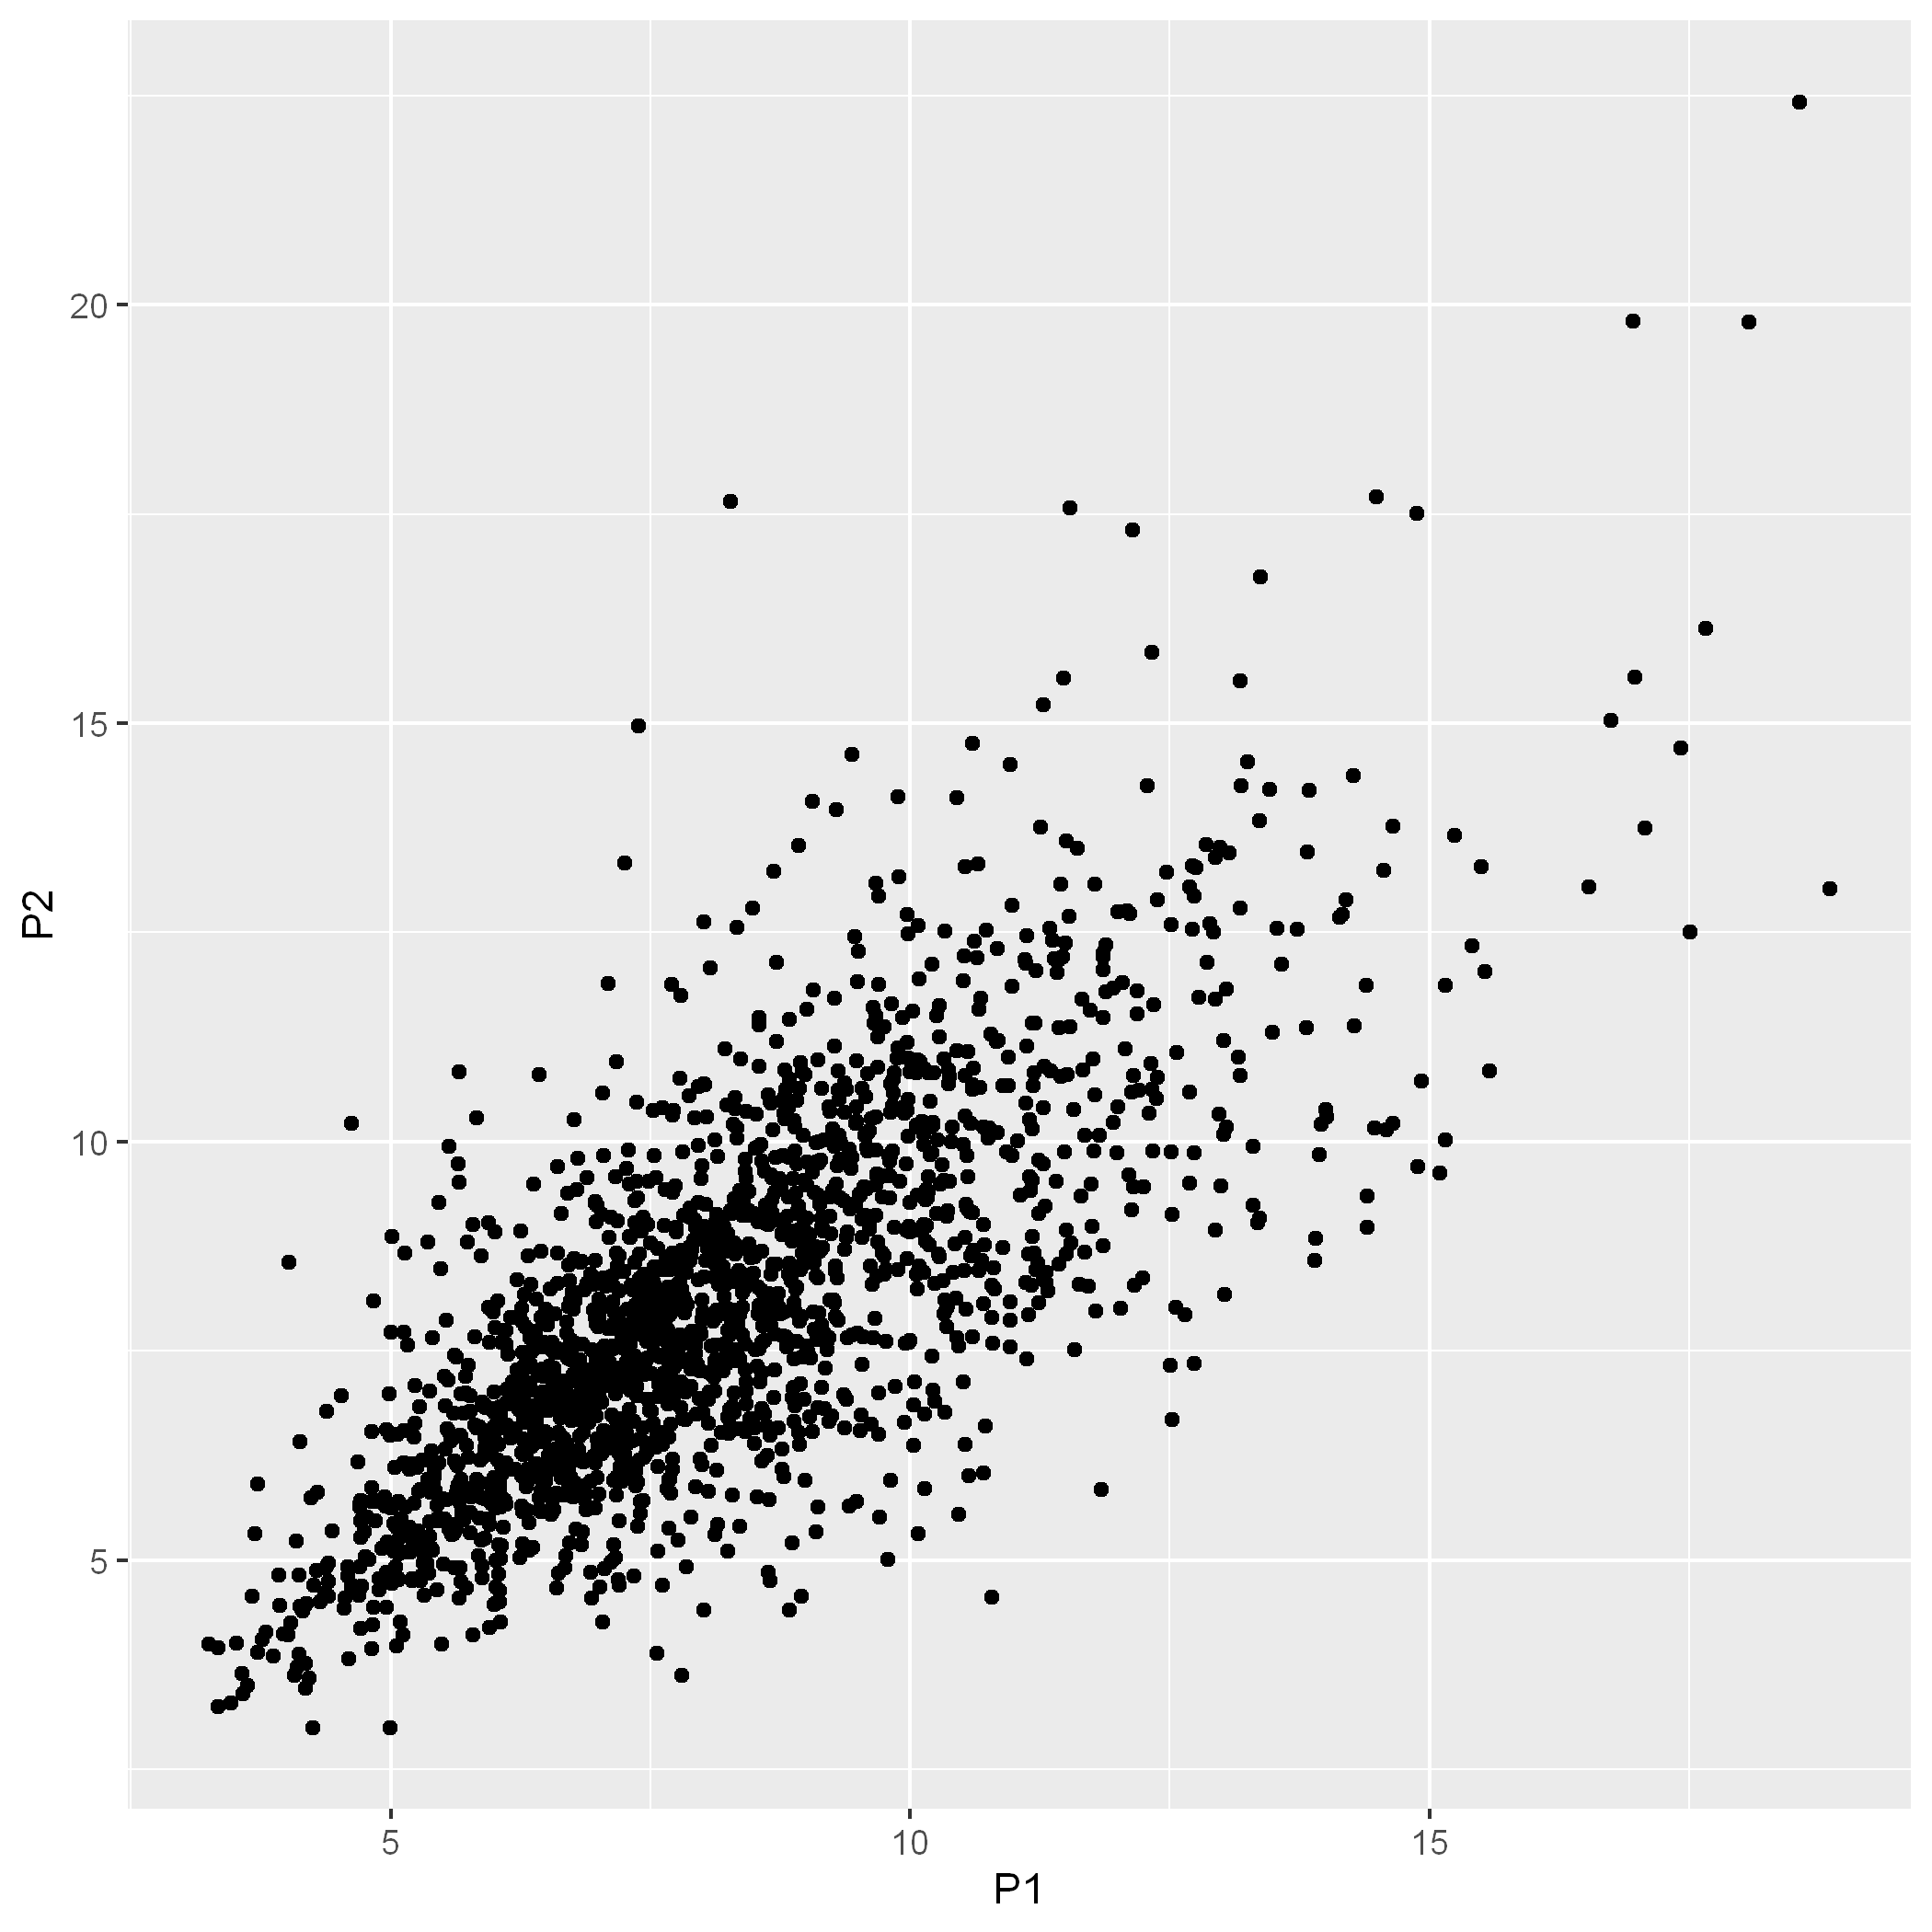

In [50]:
vd %>% 
    ggplot(aes(x=P1, y=P2)) +
    geom_point()


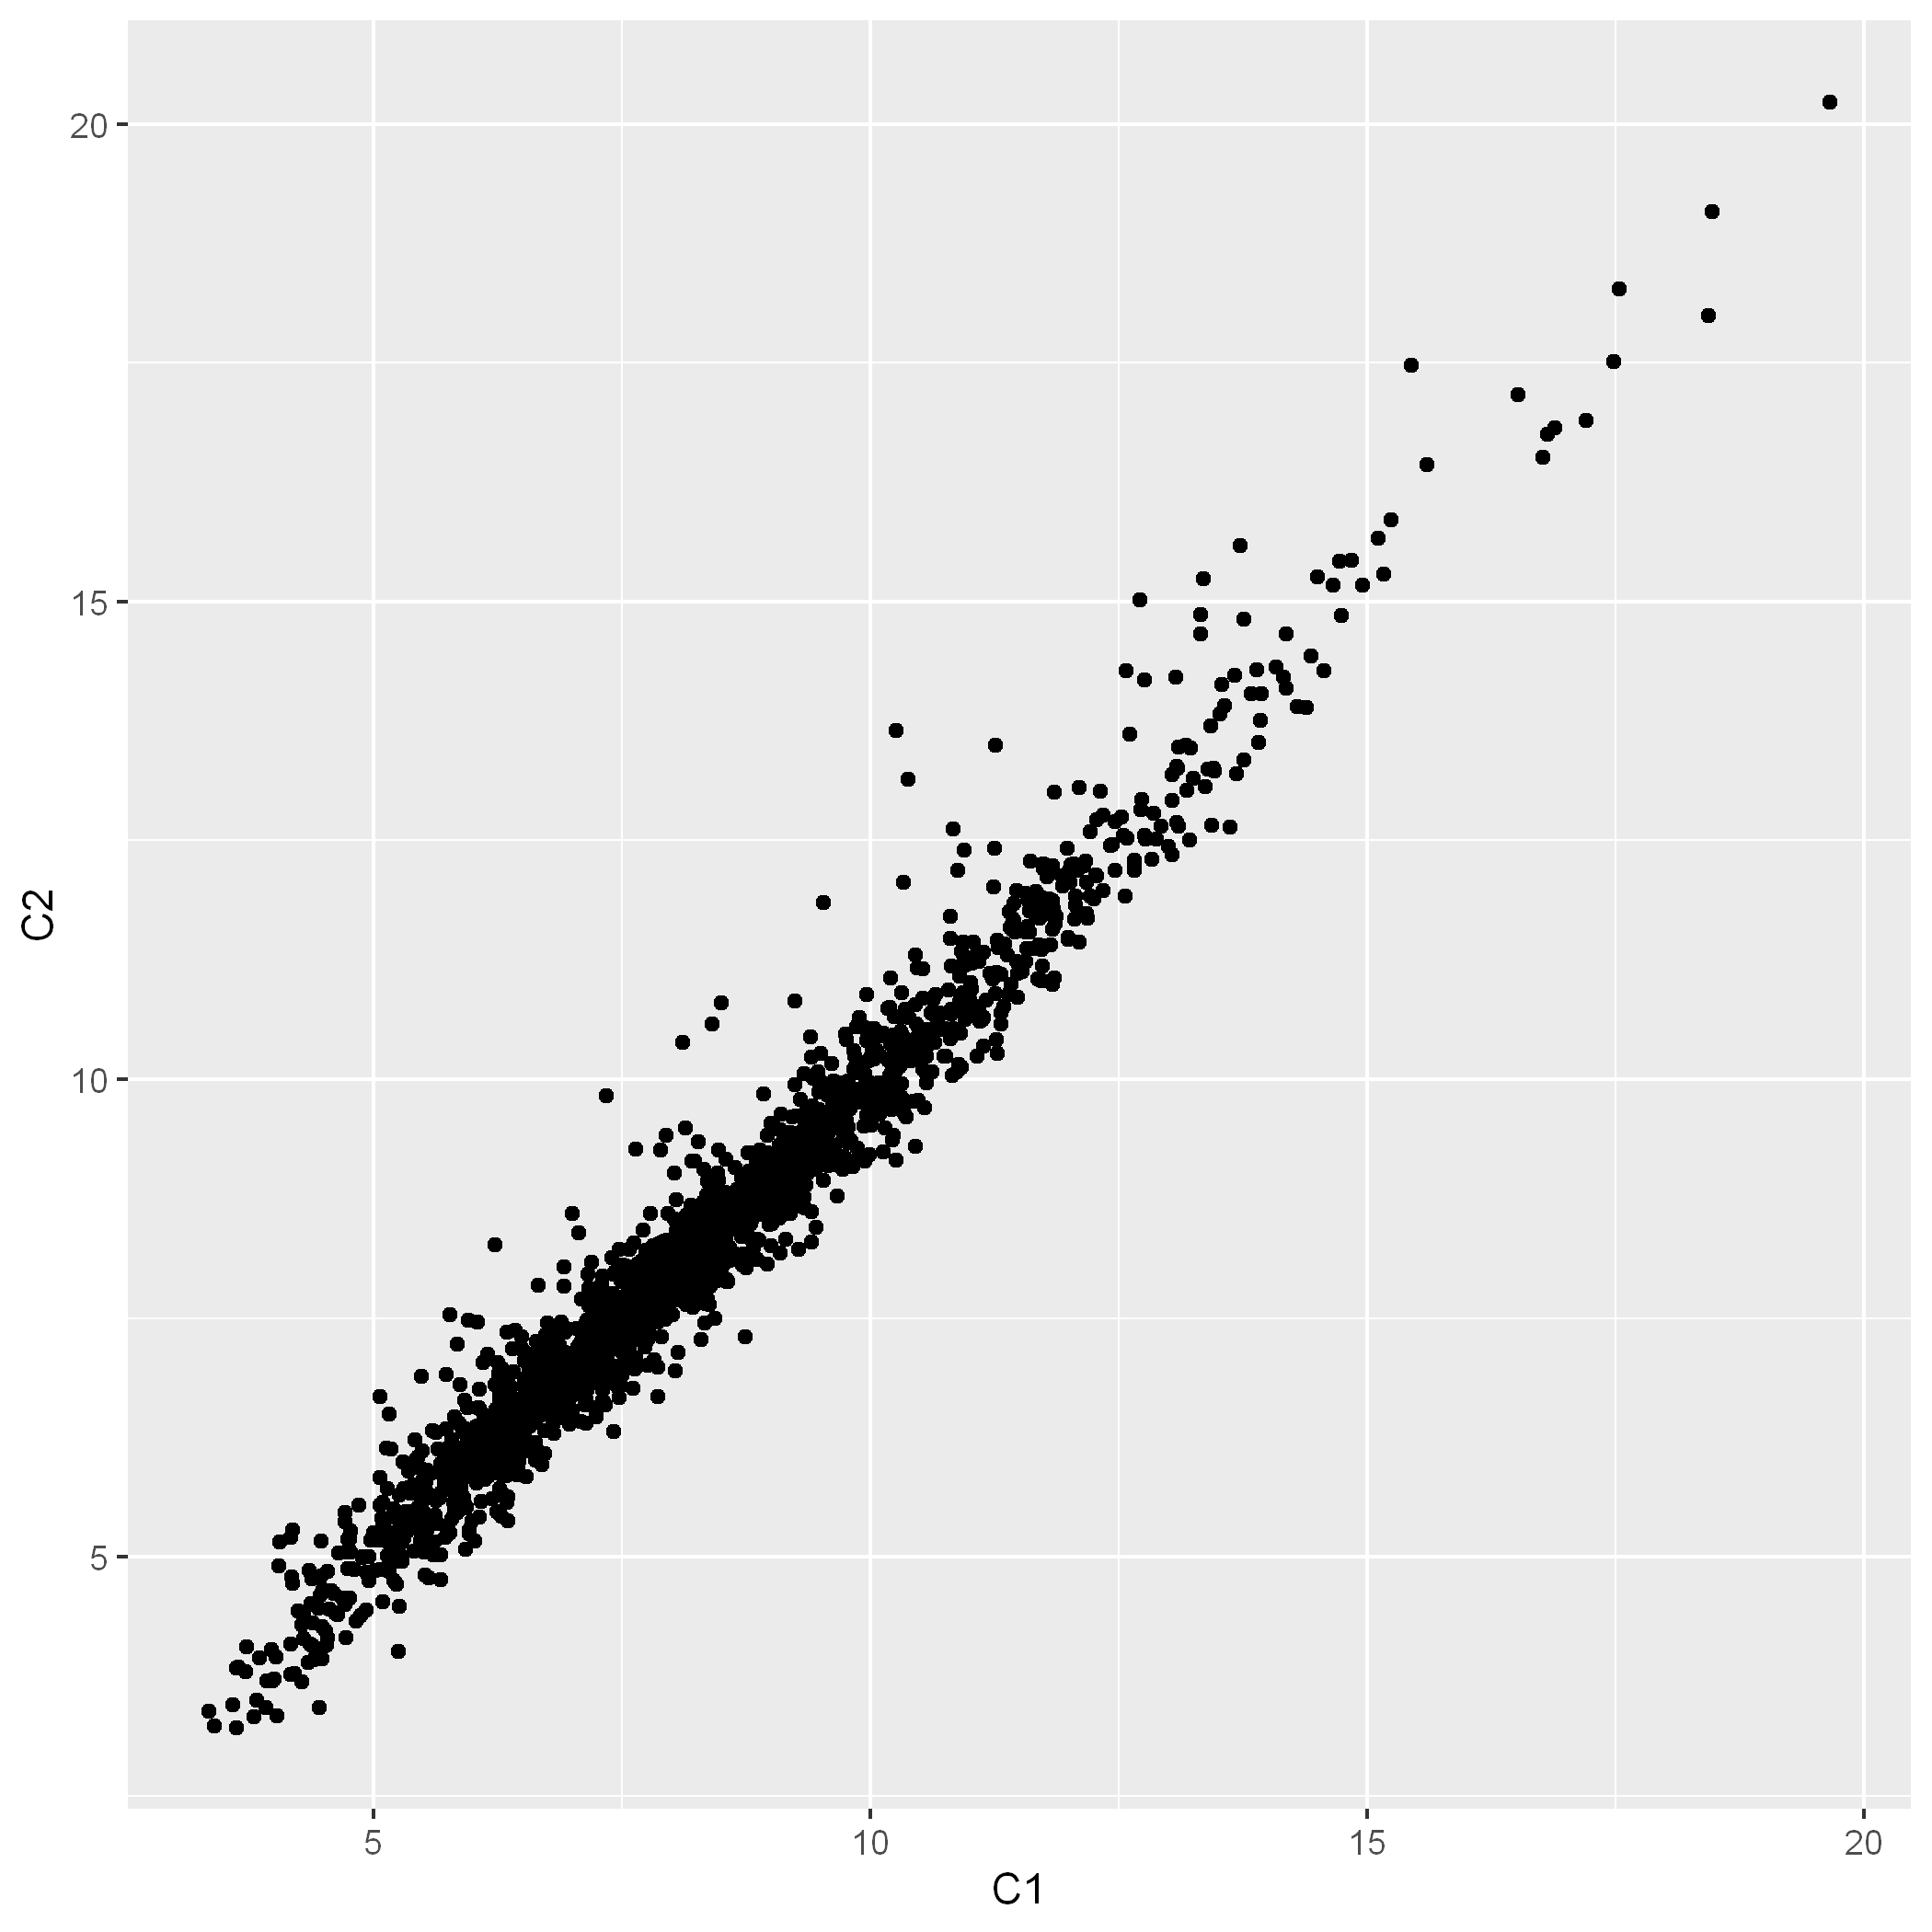

In [51]:
vd %>% 
    ggplot(aes(x=C1, y=C2)) +
    geom_point()


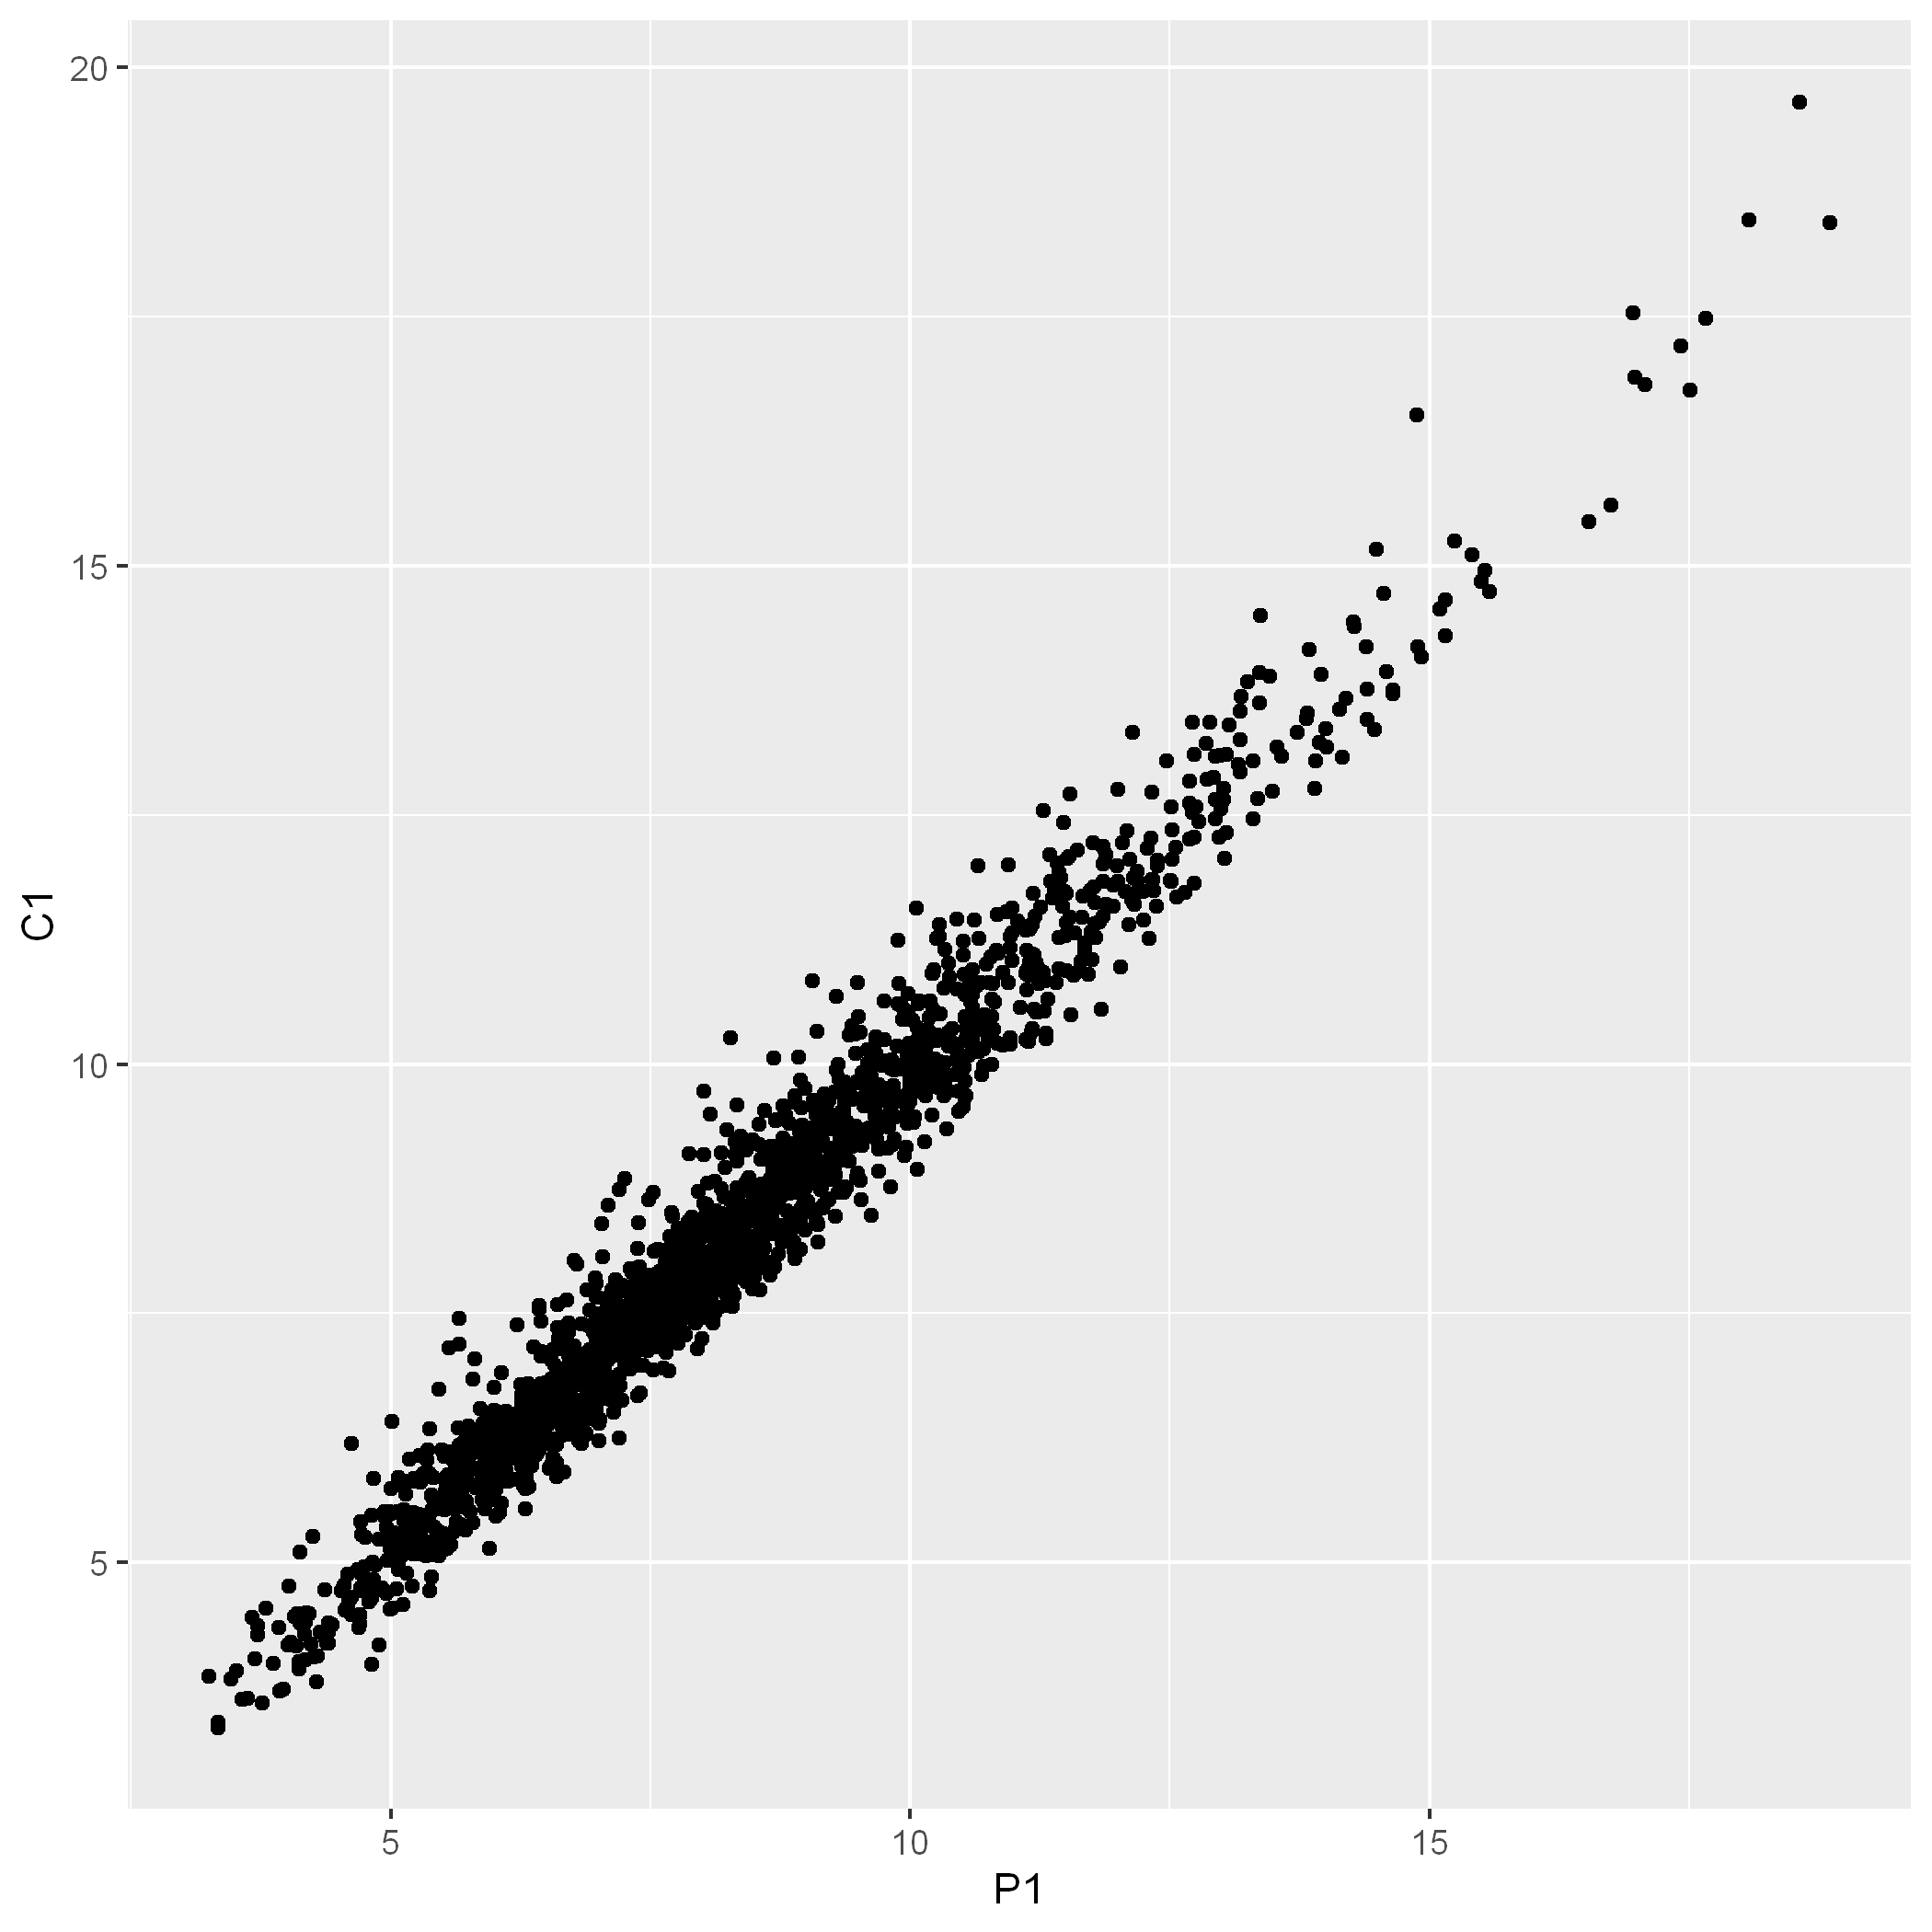

In [54]:
vd %>% 
    ggplot(aes(x=P1, y=C1)) +
    geom_point()


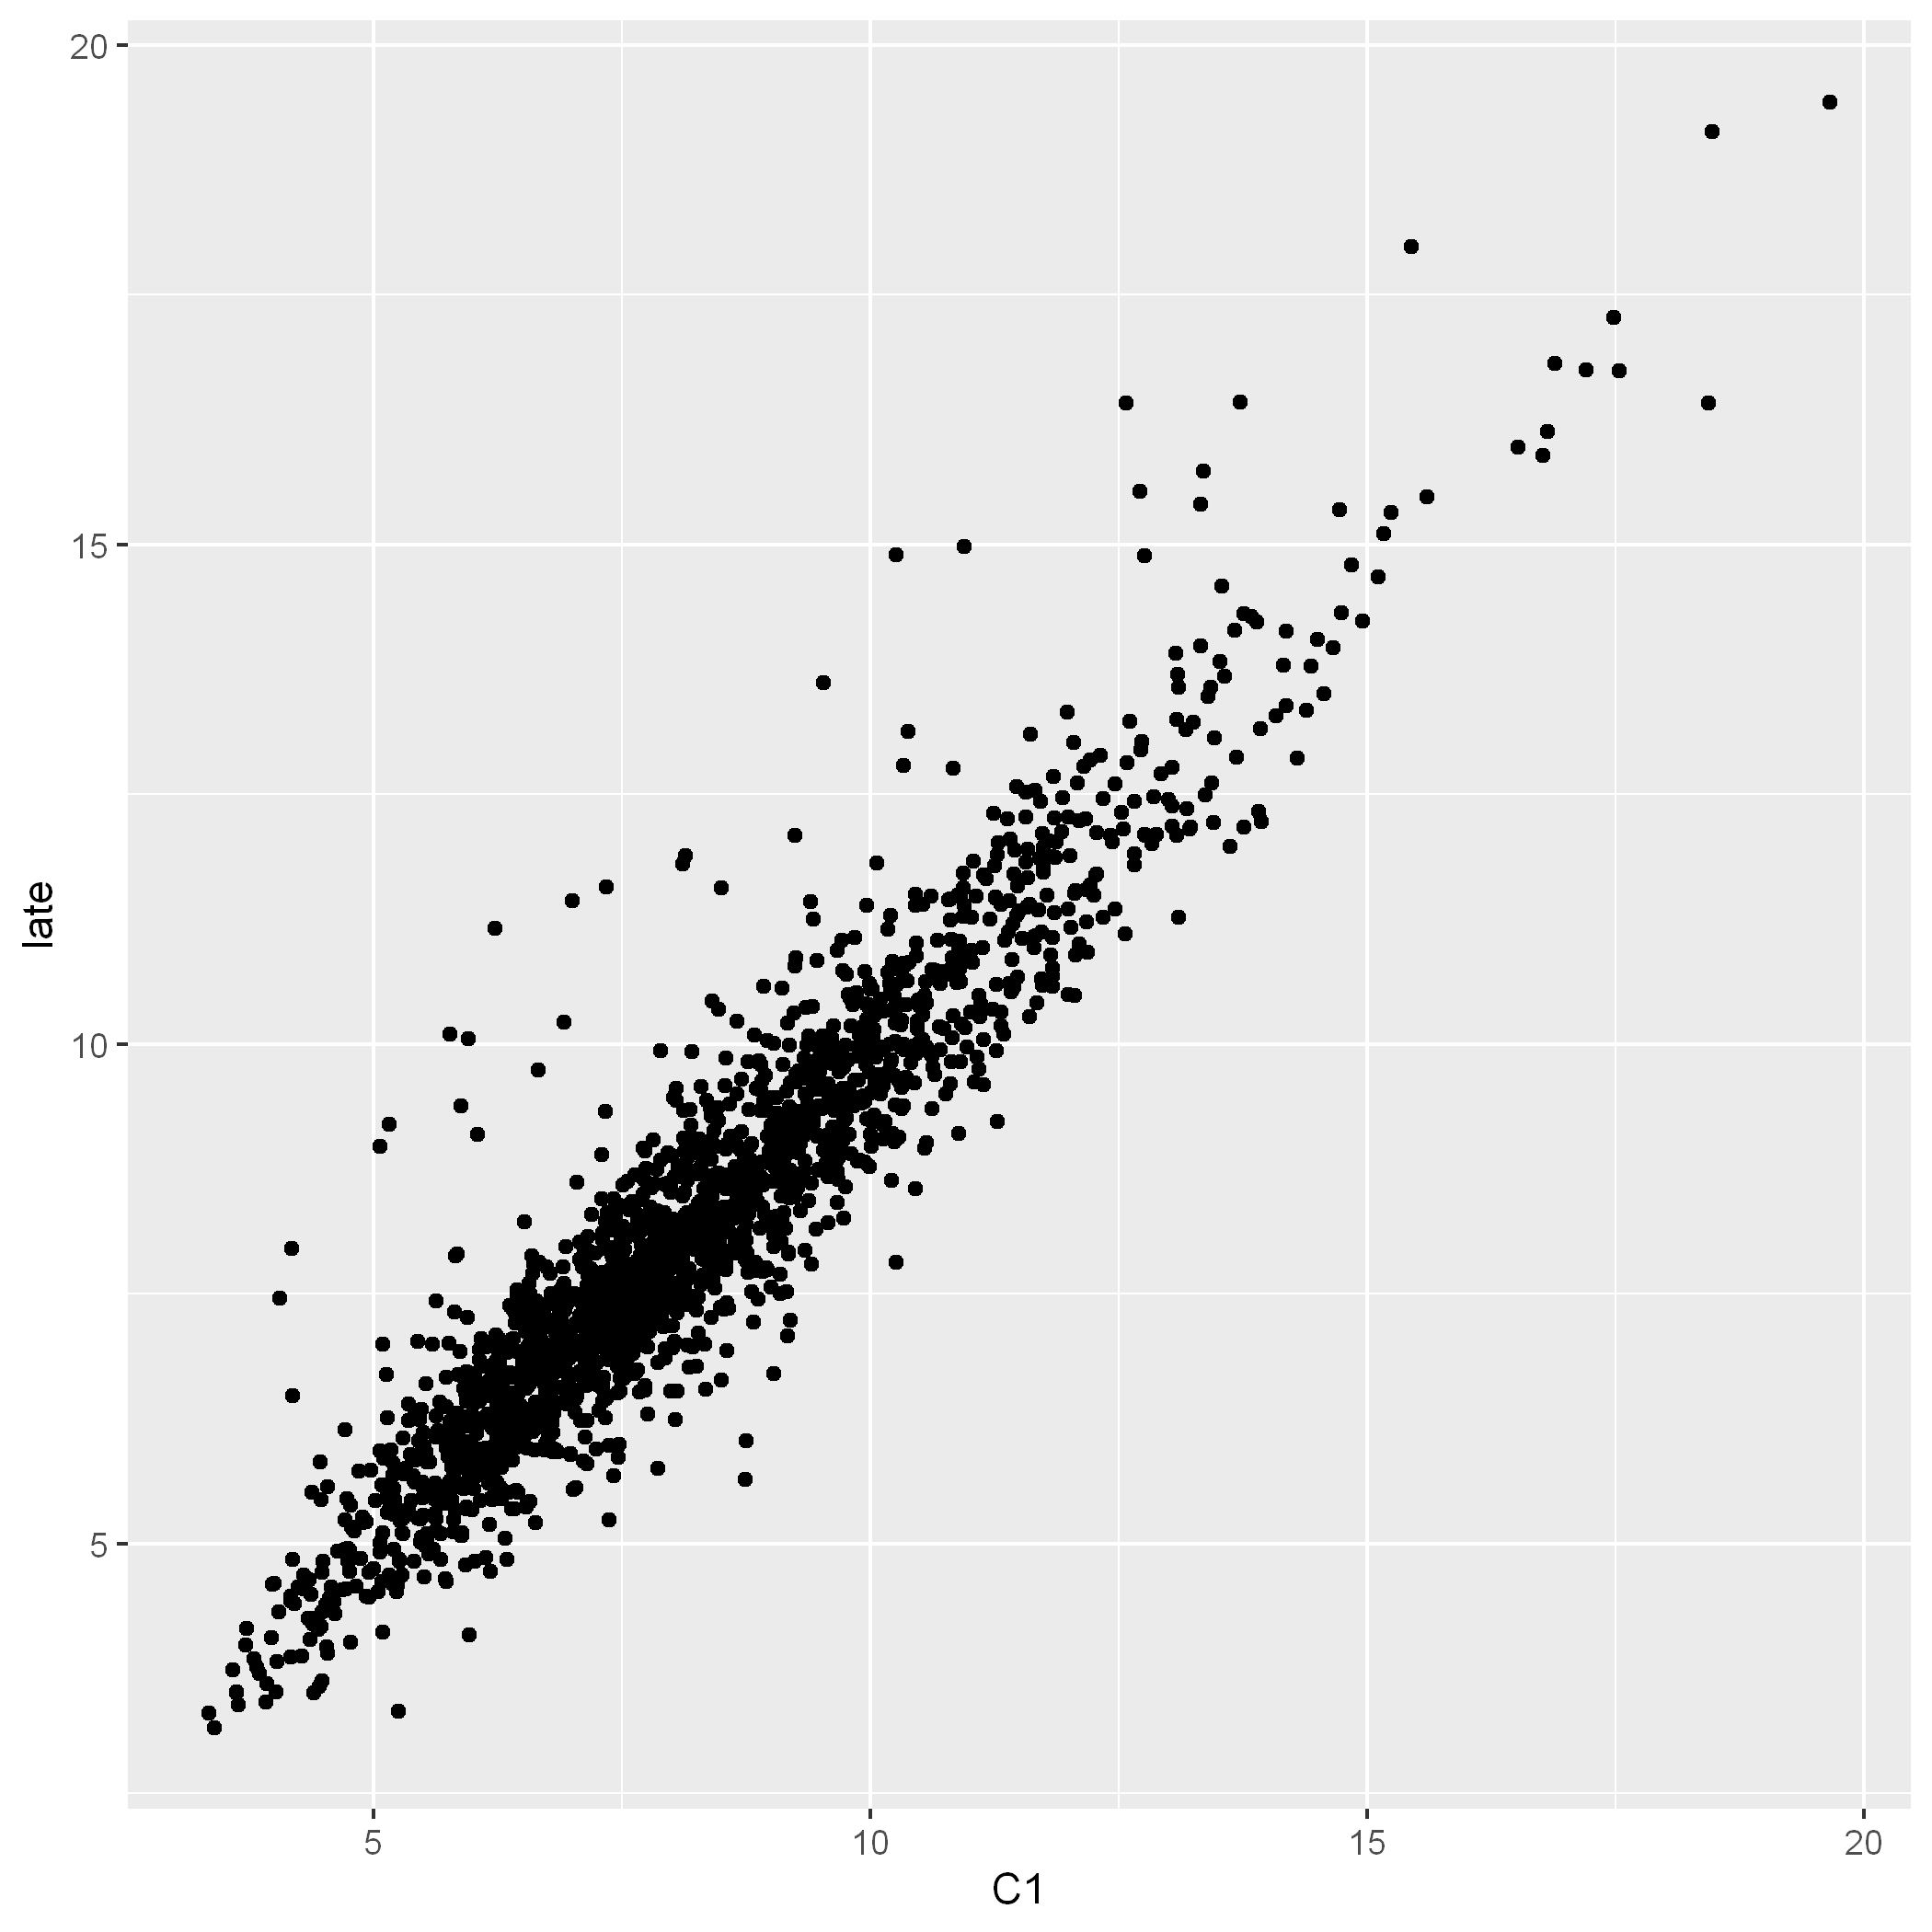

In [53]:
vd %>% 
    ggplot(aes(x=C1, y=late)) +
    geom_point()
